# Diabetes Detection

### importing the libraries

In [58]:
import numpy as np      #for mathemtical operation
import pandas as pd     # for reading and analyze data
import seaborn as sns
import matplotlib.pyplot as plt  # for visualizing data
import warnings
warnings.filterwarnings("ignore")

In [118]:
# Loading and reading the dataset
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
df.shape

(768, 9)

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
# To find null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [66]:
df.duplicated().sum()

0

In [67]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['Insulin']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,35.000000,33.6,0.627,50,1
1,1,85.0,66.0,29,29.000000,26.6,0.351,31,0
2,8,183.0,64.0,0,20.536458,23.3,0.672,32,1
3,1,89.0,66.0,23,23.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,48.000000,32.9,0.171,63,0
764,2,122.0,70.0,27,27.000000,36.8,0.340,27,0
765,5,121.0,72.0,23,23.000000,26.2,0.245,30,0
766,1,126.0,60.0,0,20.536458,30.1,0.349,47,1


In [119]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

# Data Visualization

Negative (0): 500
Positive (1): 268


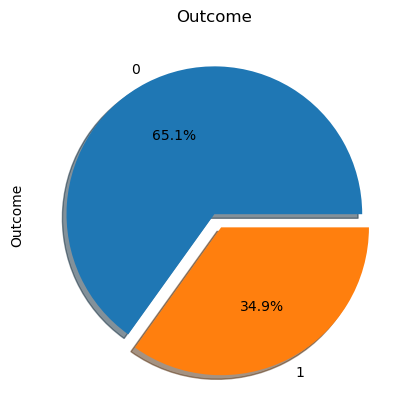

In [126]:
# Pie Chart
plt.title("Outcome")
ax =figsize=(10, 5)
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
N, P = df['Outcome'].value_counts()
print('Negative (0):', N)
print('Positive (1):', P)

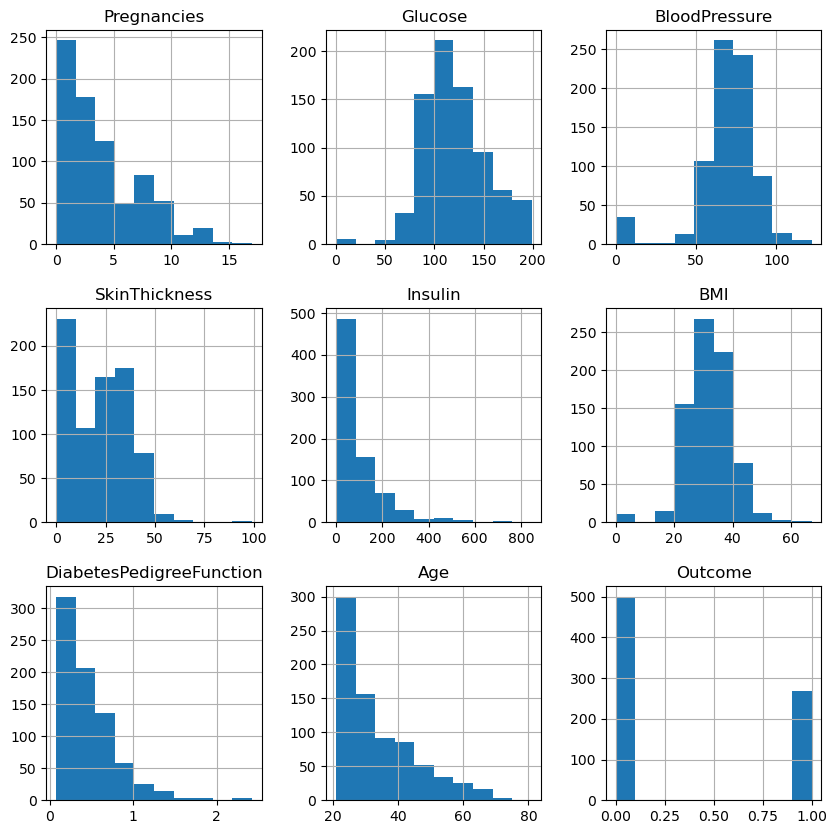

In [123]:
#Histogram
df.hist(bins=10, figsize=(10, 10))
plt.show()

Text(0.5, 1.0, 'Distribution of Pregnancies')

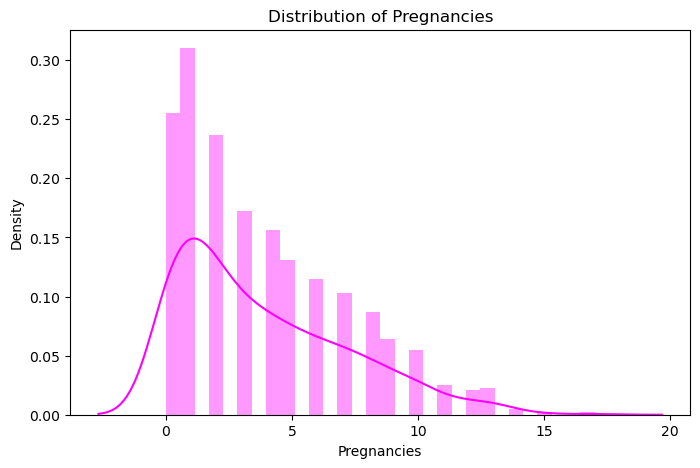

In [127]:
#Bar Chart
plt.figure(figsize=(8,5))
sns.distplot(df["Pregnancies"],bins = 30,color = "magenta")
plt.title("Distribution of Pregnancies")

Text(0.5, 1.0, 'Distribution of BloodPressure')

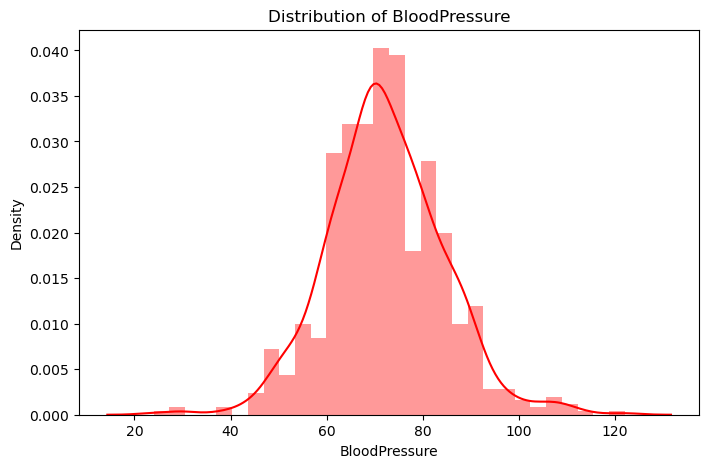

In [73]:
#BarChart
plt.figure(figsize=(8,5))
sns.distplot(df["BloodPressure"],bins = 30,color = "Red")
plt.title("Distribution of BloodPressure")

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

<Figure size 600x500 with 0 Axes>

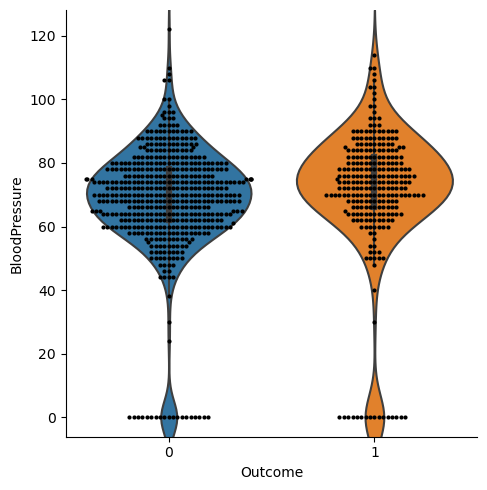

In [128]:
#Catplot
plt.figure(figsize=(6,5))
g = sns.catplot(data = df, x="Outcome", y= "BloodPressure", kind="violin",innerplace=True)
sns.swarmplot(data = df,x = "Outcome", y= "BloodPressure",color= "k",size=3)

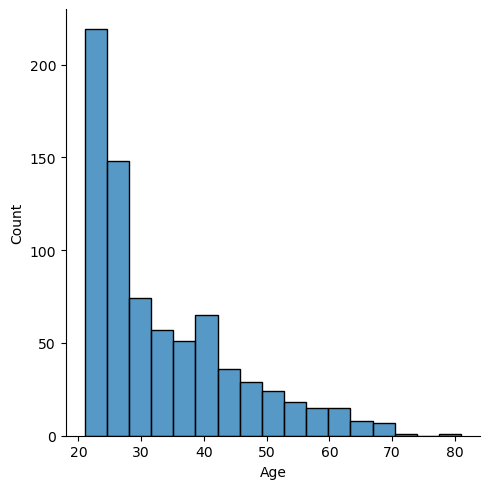

In [75]:
#Displot
sns.displot(df,x= "Age")

<Figure size 600x500 with 0 Axes>

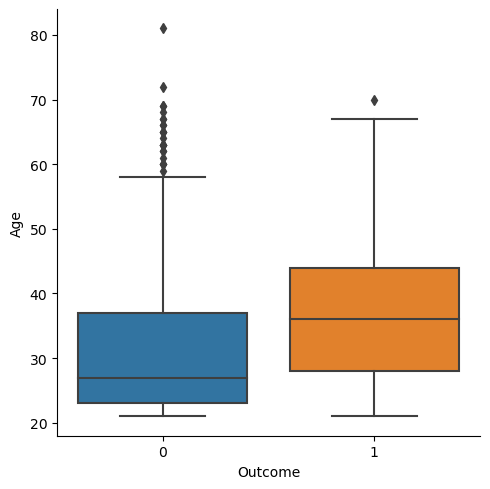

In [76]:
#Box-plot
plt.figure(figsize=(6,5))
sns.catplot(data=df, x="Outcome", y="Age",kind="box")

Text(0.5, 1.0, 'Distribution of BMI')

<Figure size 600x500 with 0 Axes>

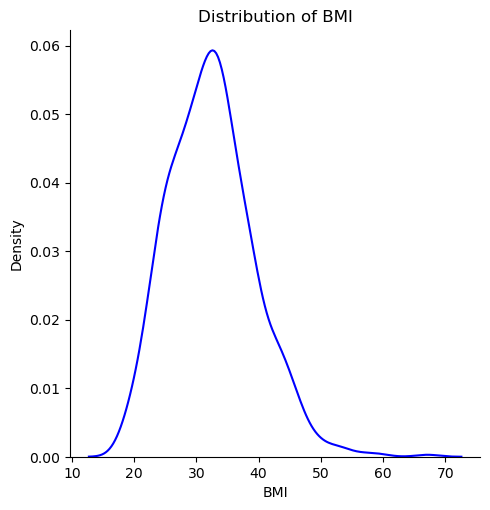

In [77]:
plt.figure(figsize=(6,5))
sns.displot(df,x="BMI",color="blue",kind="kde")
plt.title("Distribution of BMI")

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

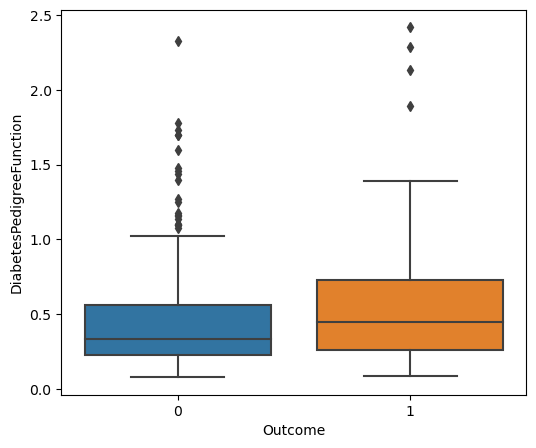

In [78]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction",data=df)

In [79]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Data Processing

<Axes: >

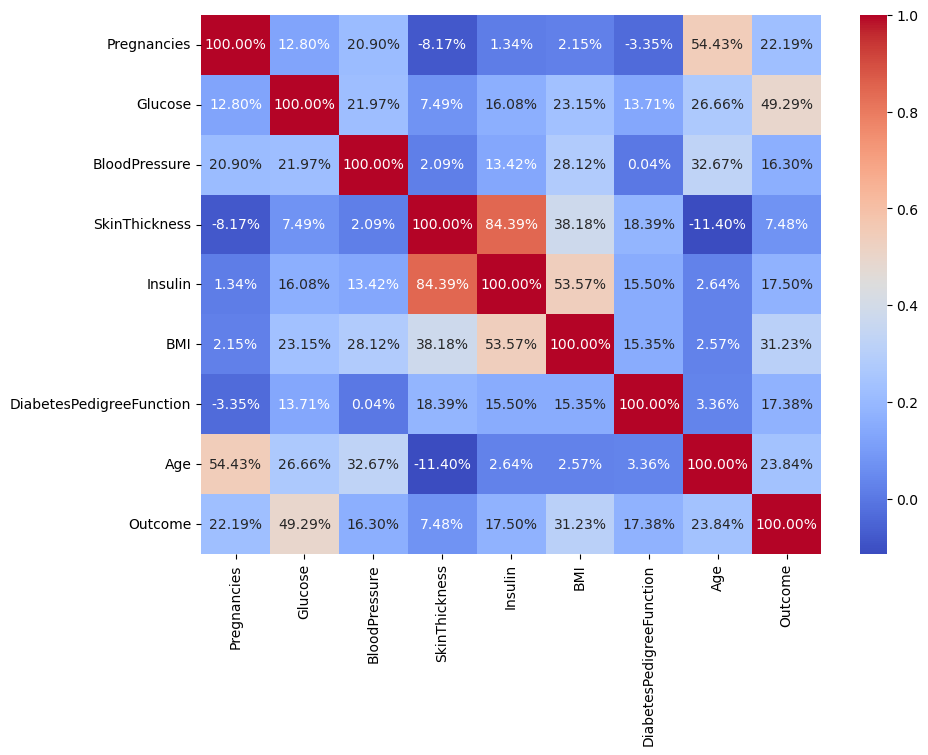

In [80]:
#Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt=".2%",cmap="coolwarm")

In [129]:
#outlier removal
avg = df["BloodPressure"].mean()
df["BloodPressure"] = df["BloodPressure"].apply(lambda v:avg if v==0 else v)

Text(0.5, 1.0, ' Distribution of BloodPressure')

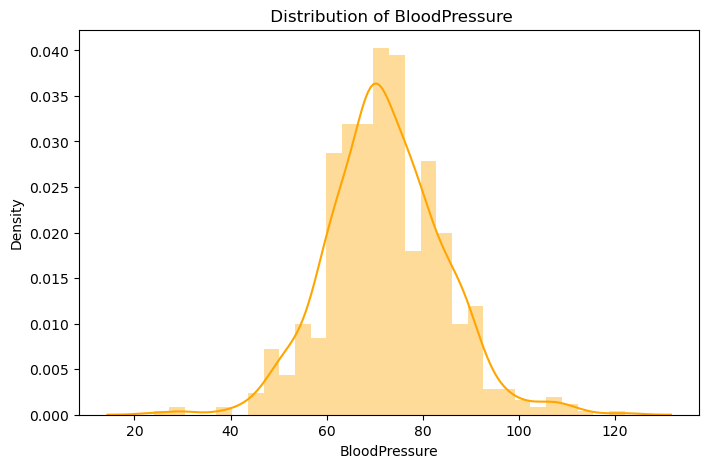

In [130]:
plt.figure(figsize = (8,5))
sns.distplot(df["BloodPressure"] , bins = 30,color = "Orange")
plt.title(" Distribution of BloodPressure")

In [83]:
bmi_avg = df["BMI"].mean()
df["BMI"] = df["BMI"].apply(lambda v:avg if v==0 else v)

Text(0.5, 1.0, ' Distribution of BMI')

<Figure size 800x500 with 0 Axes>

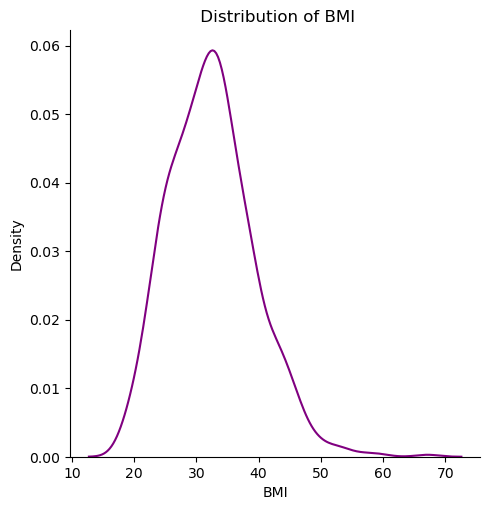

In [84]:

plt.figure(figsize = (8,5))
sns.displot(df, x="BMI",color = "Purple",kind= "kde")
plt.title(" Distribution of BMI")

# Split Data

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,35.000000,33.6,0.627,50,1
1,1,85.0,66.0,29,29.000000,26.6,0.351,31,0
2,8,183.0,64.0,0,20.536458,23.3,0.672,32,1
3,1,89.0,66.0,23,23.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,35.000000,43.1,2.288,33,1


In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,26.606479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,9.631241,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,20.536458,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
X= df.drop(columns="Outcome")
Y = df["Outcome"]

In [88]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,35.000000,33.6,0.627,50
1,1,85.0,66.0,29,29.000000,26.6,0.351,31
2,8,183.0,64.0,0,20.536458,23.3,0.672,32
3,1,89.0,66.0,23,23.000000,28.1,0.167,21
4,0,137.0,40.0,35,35.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,48.000000,32.9,0.171,63
764,2,122.0,70.0,27,27.000000,36.8,0.340,27
765,5,121.0,72.0,23,23.000000,26.2,0.245,30
766,1,126.0,60.0,0,20.536458,30.1,0.349,47


In [89]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [90]:
X.shape, Y.shape

((768, 8), (768,))

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=30)

In [92]:
x_train.shape , x_test.shape 

((614, 8), (154, 8))

In [93]:
y_train.shape , y_test.shape

((614,), (154,))

# Logistic Regression

In [94]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
M_l = LogisticRegression()

In [95]:
M_l.fit(x_train , y_train)

LogisticRegression()

In [132]:
y_predicted_l = M_l.predict(x_test)

In [134]:
y_predicted_l

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [133]:
M_l.score(x_test , y_test)

0.7922077922077922

#### Evaluate the model performance using matrics like Accuracy,Confusion Matrix and Classification Report

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
Accuracy = accuracy_score(y_test,y_predicted_l)
print('Accuracy:',Accuracy)

Accuracy: 0.7922077922077922


In [100]:
Confusion_matrix = confusion_matrix(y_test,y_predicted_l)
print('Confusion_matrix: \n',Confusion_matrix)


Confusion_matrix: 
 [[91 13]
 [19 31]]


In [101]:
Classification_report = classification_report(y_test,y_predicted_l)
print('Classification_report: \n',Classification_report)

Classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.70      0.62      0.66        50

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [102]:
from sklearn.metrics import recall_score,precision_score,f1_score

Recall = recall_score(y_test,y_predicted_l)
print('Recall:',Recall)

Precision = precision_score(y_test,y_predicted_l)
print('Precision:',Precision)

F1_score = f1_score(y_test,y_predicted_l)
print('F1_score:',F1_score)

Recall: 0.62
Precision: 0.7045454545454546
F1_score: 0.6595744680851063


# Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
M_d =  DecisionTreeClassifier()

In [110]:
M_d.fit(x_train , y_train)

DecisionTreeClassifier()

In [109]:
y_predicted_d = M_d.predict(x_test)

In [108]:
M_d.score(x_test , y_test)

0.6948051948051948

In [112]:
Accuracy = accuracy_score(y_test,y_predicted_d)
print('Accuracy:',Accuracy)

Accuracy: 0.6948051948051948


In [113]:
Confusion_matrix = confusion_matrix(y_test,y_predicted_d)
print('Confusion_matrix: \n',Confusion_matrix)

Confusion_matrix: 
 [[78 26]
 [21 29]]


In [114]:
Classification_report = classification_report(y_test,y_predicted_d)
print('Classification_report: \n',Classification_report)

Classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       104
           1       0.53      0.58      0.55        50

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.69      0.70       154



In [117]:
Recall = recall_score(y_test,y_predicted_d)
print('Recall:',Recall)

Precision = precision_score(y_test,y_predicted_d)
print('Precision:',Precision)

F1_score = f1_score(y_test,y_predicted_d)
print('F1_score:',F1_score)

Recall: 0.58
Precision: 0.5272727272727272
F1_score: 0.5523809523809523


### Result : The most of accuracy is given by logistic regression Classifer Model.It gives 79.22% accuracy.